In [ ]:
#pip install textblob

In [ ]:

#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Import required libraries
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from sklearn import datasets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1AVW3om1x5IHgRRPK-ceJDle9w_S5CDpO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('covid19_tweets.csv') 

In [ ]:
# Load Dataset
data = pd.read_csv("covid19_tweets.csv")
unprocessed_data = data
data = data.dropna()

In [ ]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False


In [ ]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179101,New Jersey Herald,"Newton, NJ","The New Jersey Herald, a daily newspaper in Ne...",2010-01-07 18:19:37,6274,162,38,False,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']",SocialNewsDesk,False
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,False,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19'],Twitter Web App,False
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [ ]:
data.shape

(99138, 13)

In [ ]:
# Statistics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99138 entries, 2 to 179106
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         99138 non-null  object
 1   user_location     99138 non-null  object
 2   user_description  99138 non-null  object
 3   user_created      99138 non-null  object
 4   user_followers    99138 non-null  int64 
 5   user_friends      99138 non-null  int64 
 6   user_favourites   99138 non-null  int64 
 7   user_verified     99138 non-null  bool  
 8   date              99138 non-null  object
 9   text              99138 non-null  object
 10  hashtags          99138 non-null  object
 11  source            99138 non-null  object
 12  is_retweet        99138 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 9.3+ MB


In [ ]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [ ]:
# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
# Plot Wordcloud for Top-50 words
stopwords = set(STOPWORDS)
def display_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Plot Frequency of User Names, Tweet Sources...
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

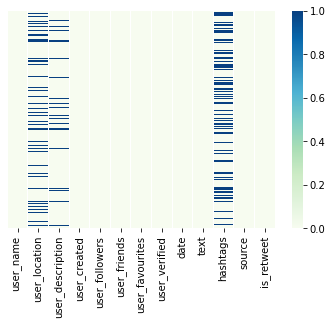

In [ ]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(unprocessed_data.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


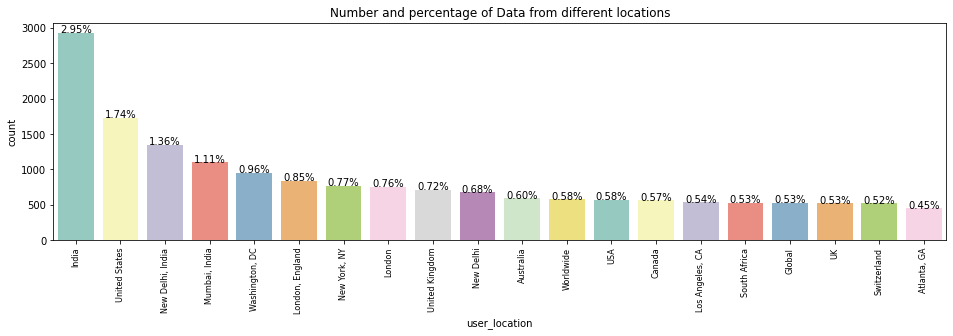

In [ ]:
# Percentage of data from different locations
data_source("user_location", "Data from different locations", data, 4)

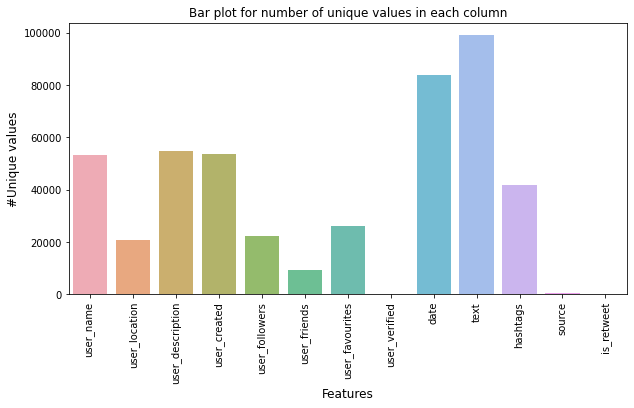

In [ ]:

unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


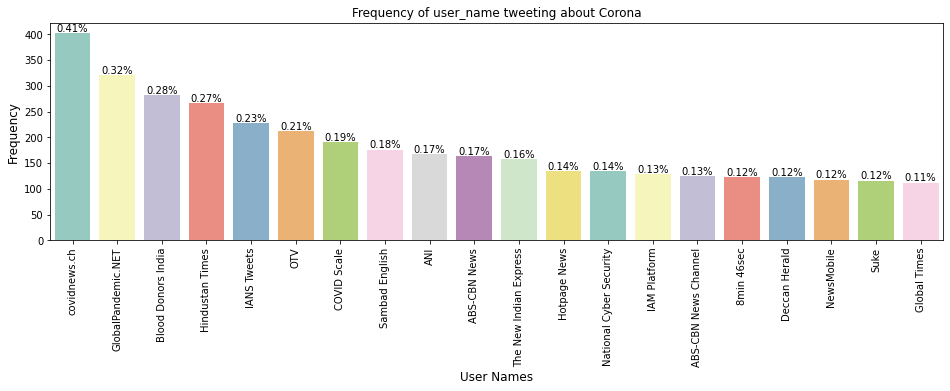

In [ ]:
# Top 20 users based on frequency of tweets
plot_frequency_charts(data, 'user_name', 'User Names')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


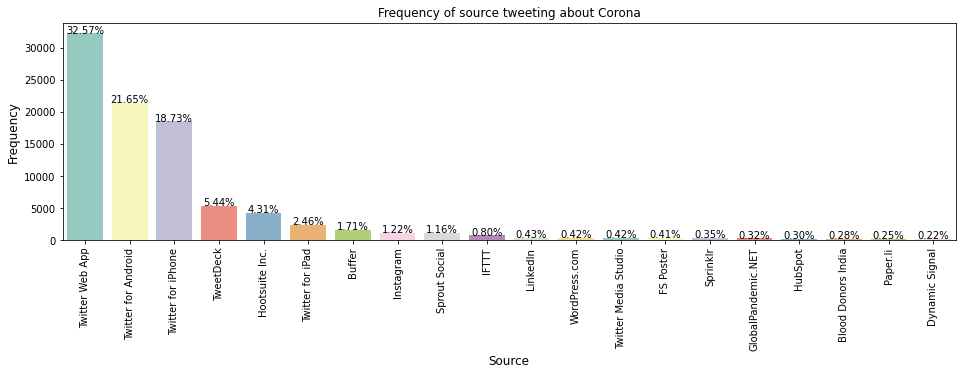

In [ ]:
# Top 20 tweet sources based on frequency of tweets
plot_frequency_charts(data, 'source','Source')

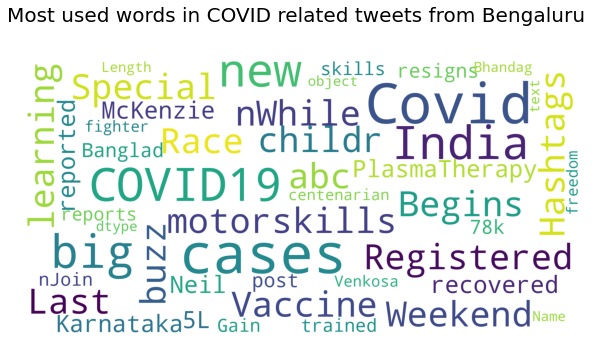

In [ ]:
# WordCloud for top-50 words in tweets from Bangalore
bang_df1 = data.loc[data.user_location == "Bengaluru"]
bang_df2 = data.loc[data.user_location == "Bangalore"]
dfs = [bang_df2, bang_df1]
bang_df = pd.concat(dfs, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(bang_df['text'], title = 'Most used words in COVID related tweets from Bengaluru')

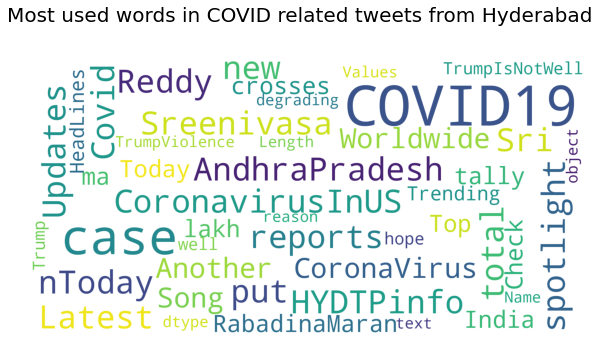

In [ ]:
# WordCloud for top-50 words in tweets from Bangalore
bang_df1 = data.loc[data.user_location == "Hyderabad"]
bang_df2 = data.loc[data.user_location == "Hyderabad"]
dfs = [bang_df2, bang_df1]
bang_df = pd.concat(dfs, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(bang_df['text'], title = 'Most used words in COVID related tweets from Hyderabad')

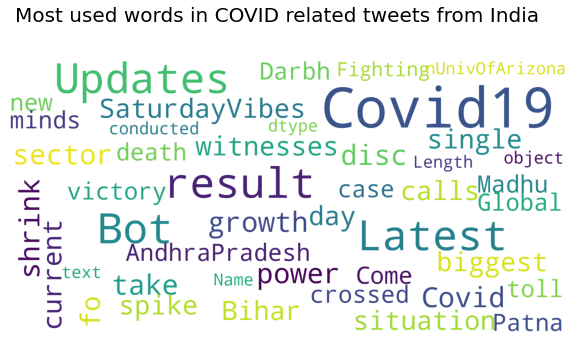

In [ ]:
 #WordCloud for top-50 words in tweets from India
india_df1 = data.loc[data.user_location=="India"]
india_df2 = data.loc[data.user_location=="New Delhi, India"]
india_df3 = data.loc[data.user_location=="Mumbai, India"]
india_df4 = data.loc[data.user_location=="New Delhi"]
dfs1 = [india_df1, india_df2, india_df3, india_df4]
india_df = pd.concat(dfs1, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(india_df['text'], title = 'Most used words in COVID related tweets from India')

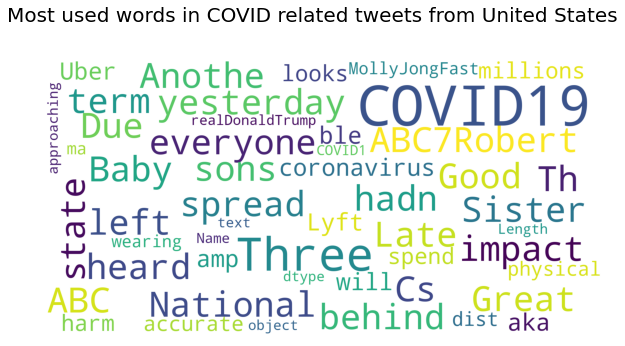

In [ ]:
# WordCloud for top-50 words in tweets from United States of America
usa_df1 = data.loc[data.user_location=="United States"]
usa_df2 = data.loc[data.user_location=="Washington, DC"]
usa_df3 = data.loc[data.user_location=="New York, NY"]
usa_df4 = data.loc[data.user_location=="Los Angeles, CA"]
usa_df5 = data.loc[data.user_location=="USA"]
usa_df6 = data.loc[data.user_location=="California, USA"]
dfs2 = [usa_df1, usa_df2, usa_df3, usa_df4, usa_df5, usa_df6]
usa_df = pd.concat(dfs2, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(usa_df['text'], title = 'Most used words in COVID related tweets from United States')

# Data Cleansing

In [ ]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [ ]:
import copy
df = copy.deepcopy(data[['text']])
df["text"]= df["text"].astype(str) 

In [ ]:
#apply the function
# df = data['content']
df['text'] = df['text'].progress_apply(preprocessing)

100%|██████████| 99138/99138 [00:08<00:00, 11555.75it/s]


In [ ]:
df.head()

,text
2,diane3443 wdunlap realdonaldtrump trump never ...
3,brookbanktv the one gift covid19 has give me i...
4,25 july media bulletin on novel coronavirusup...
5,coronavirus covid19 deaths continue to rise it...
6,how covid19 will change work in general and re...


In [ ]:
dataframe = df
#lower casing
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe.head()

,text
2,diane3443 wdunlap realdonaldtrump trump never ...
3,brookbanktv the one gift covid19 has give me i...
4,25 july media bulletin on novel coronavirusupd...
5,coronavirus covid19 deaths continue to rise it...
6,how covid19 will change work in general and re...


In [ ]:
#Punctuation removal
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,text
2,diane3443 wdunlap realdonaldtrump trump never ...
3,brookbanktv the one gift covid19 has give me i...
4,25 july media bulletin on novel coronavirusupd...
5,coronavirus covid19 deaths continue to rise it...
6,how covid19 will change work in general and re...


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Stopwords removal
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head()

2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv one gift covid19 give appreciation...
4    25 july media bulletin novel coronavirusupdate...
5    coronavirus covid19 deaths continue rise almos...
6    covid19 change work general recruiting specifi...
Name: text, dtype: object

In [ ]:
#Frequent words removal
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]

freq

covid19        81787
cases          12101
coronavirus     8902
new             8217
pandemic        5128
deaths          4463
people          4392
us              3838
positive        3477
health          2870
dtype: int64

In [ ]:
#freq = list(freq.index)
#dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#dataframe.head()

In [ ]:
#Rare words removal
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-20:]
rare_word

httpstcopd75zio4we    1
httpstconos2zj7wvh    1
httpstcordqrgagi1q    1
00000027              1
httpstcokz6ys0zygf    1
httpstcoskqx8rogdg    1
672                   1
httpstco4nloauj29d    1
johnrashton47         1
httpstco2w5zbijmm0    1
duet                  1
recital               1
httpstco1shfvtqzds    1
httpstco84pbvxtkfj    1
sangxa                1
httpstcotfahopngqi    1
phillipmacloud        1
httpstcosxzo3eibvm    1
httpstcofv0lmzloil    1
httpstco6anhsif5gh    1
dtype: int64

In [ ]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe.head()

,text
2,diane3443 wdunlap realdonaldtrump trump never ...
3,brookbanktv one gift give appreciation simple ...
4,25 july media bulletin novel coronavirusupdate...
5,continue rise almost bad ever politicians busi...
6,change work general recruiting specifically vi...


In [ ]:
#textblob
from textblob import Word
from textblob import TextBlob

In [ ]:
#Spelling Correction
#dataframe['text'].apply(lambda x: str(TextBlob(x).correct()))
#dataframe['text'].head()

In [ ]:
#Tokenization
nltk.download('punkt')
nltk.download('wordnet')

#TextBlob(dataframe['text'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Lematization
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv one gift give appreciation simple ...
4    25 july medium bulletin novel coronavirusupdat...
5    continue rise almost bad ever politician busin...
6    change work general recruiting specifically vi...
Name: text, dtype: object

# Labeling Using Polarity (Textblob)

In [ ]:
#new df after removed duplicate text
new_df = copy.deepcopy(dataframe)
new_df.head()

#sentiment labeling 
text = new_df.text
text.head()

2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv one gift give appreciation simple ...
4    25 july medium bulletin novel coronavirusupdat...
5    continue rise almost bad ever politician busin...
6    change work general recruiting specifically vi...
Name: text, dtype: object

In [ ]:
new_df.head(20)

,text
2,diane3443 wdunlap realdonaldtrump trump never ...
3,brookbanktv one gift give appreciation simple ...
4,25 july medium bulletin novel coronavirusupdat...
5,continue rise almost bad ever politician busin...
6,change work general recruiting specifically vi...
9,pope god prophet sadhu sundar selvaraj watch h...
11,order httpstco4nurgx6ema logo graphicdesigner ...
12,pattyhajdu navdeepsbains one safe everyone saf...
13,let protect real number climbing fast continen...
15,nagaland police awareness city tower junction ...


In [ ]:
#Function for subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
  #Function for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  #Create two new columns
new_df['Subjectivity'] = new_df['text'].apply(getSubjectivity)
new_df['Polarity']= new_df['text'].apply(getPolarity)
 #Show new dataframe
new_df.head()

,text,Subjectivity,Polarity
2,diane3443 wdunlap realdonaldtrump trump never ...,0.000000,0.00
3,brookbanktv one gift give appreciation simple ...,0.357143,0.00
4,25 july medium bulletin novel coronavirusupdat...,0.000000,0.00
5,continue rise almost bad ever politician busin...,0.666667,-0.70
6,change work general recruiting specifically vi...,0.500000,0.05


In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'
new_df['Analysis'] = new_df['Polarity'].apply(getAnalysis)


new_df

,text,Subjectivity,Polarity,Analysis
2,diane3443 wdunlap realdonaldtrump trump never ...,0.000000,0.0000,Neutral
3,brookbanktv one gift give appreciation simple ...,0.357143,0.0000,Neutral
4,25 july medium bulletin novel coronavirusupdat...,0.000000,0.0000,Neutral
5,continue rise almost bad ever politician busin...,0.666667,-0.7000,Negative
6,change work general recruiting specifically vi...,0.500000,0.0500,Positive
...,...,...,...,...
179101,wallkill school nurse add monitoring daily dut...,0.000000,0.0000,Neutral
179102,reached 25mil worldwide oof httpstcoiqpfmbuxdc,0.000000,0.0000,Neutral
179103,thanks iamohmai nominating wearamask challenge...,0.200000,0.2000,Positive
179104,2020 year insanity lol httpstcoy48np0yzgn,0.700000,0.8000,Positive


In [ ]:
#count sentiment 
sentiment = new_df.groupby(['Analysis'])['Analysis'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['cnt'] = chart['Analysis']
chart.drop(['Analysis'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['cnt']/chart['cnt'].sum()
chart

,Analysis,cnt,percent
0,Negative,16014,0.161532
1,Neutral,52070,0.525227
2,Positive,31054,0.313240


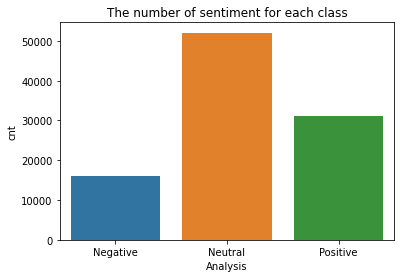

In [ ]:
#make a barchar
ax = sns.barplot(x= 'Analysis', y='cnt', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

In [ ]:
dataframe['source'] = data[['source']]

In [ ]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
#define positive and negatif
positive = df.loc[new_df['Analysis']=='Positive' ]
negative  = df.loc[new_df['Analysis']=='Negative' ]
positive.head()

,text,source
6,change work general recruiting specifically vi...,Buffer
12,pattyhajdu navdeepsbains one safe everyone saf...,Twitter Web App
13,let protect real number climbing fast continen...,Twitter Web App
23,first comprehensive review wash analysis key w...,Twitter for iPhone
28,tncoronaupdate tn cross 2 lakh mark 150055 ppp...,Twitter for Android


In [ ]:
all_positive = "".join(positive['text'].values)
all_negative = "".join(negative['text'].values)
# positive[['description']].values

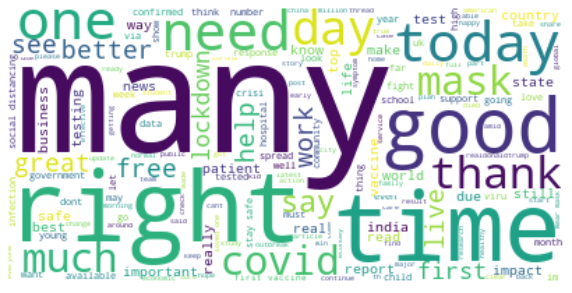

In [ ]:
plt.figure(figsize=(10,10))
create_word_cloud(all_positive)

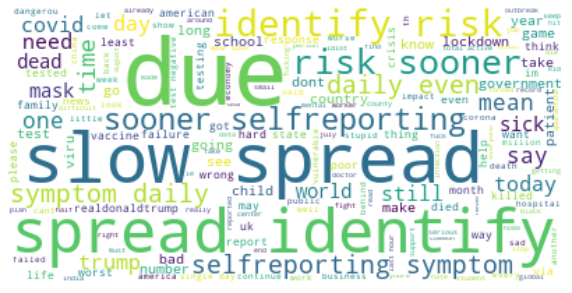

In [ ]:
plt.figure(figsize=(10,10))
create_word_cloud(all_negative)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(df['text'].values)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
random_state=123, learning_method='batch')
X_topics = lda.fit_transform(X)

In [ ]:
lda.components_.shape

(10, 5000)

In [ ]:
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print('Topic %d:' % (topic_idx + 1))
  print("".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))

Topic 1:
vaccineworldyearukrussia
Topic 2:
deathglobaldiedpatienttoday
Topic 3:
schooltestchildpublicstudent
Topic 4:
needlockdownhospitalbloodpatient
Topic 5:
2020updateaugustcoronajuly
Topic 6:
timelikelifethingwant
Topic 7:
businesscrisissupportresponsework
Topic 8:
indiadaytotalnumberreported
Topic 9:
trumpspreadhelpriskrealdonaldtrump
Topic 10:
maskdontfacewearfamily


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

,text,source
2,diane3443 wdunlap realdonaldtrump trump never ...,Twitter for Android
3,brookbanktv one gift give appreciation simple ...,Twitter for iPhone
4,25 july medium bulletin novel coronavirusupdat...,Twitter for Android
5,continue rise almost bad ever politician busin...,Twitter Web App
6,change work general recruiting specifically vi...,Buffer
...,...,...
179101,wallkill school nurse add monitoring daily dut...,SocialNewsDesk
179102,reached 25mil worldwide oof httpstcoiqpfmbuxdc,Twitter Web App
179103,thanks iamohmai nominating wearamask challenge...,Twitter for Android
179104,2020 year insanity lol httpstcoy48np0yzgn,Twitter for Android


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['text'].values.astype('U'))

In [ ]:
doc_term_matrix

<99138x34790 sparse matrix of type '<class 'numpy.int64'>'
	with 739843 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


associate
pscspeaks
wrought
shimla
httpstcoovpcmfraju
596
repeat
tynnetta
turksandcaicos
upstream


10 words with the highest probability for the first topic

In [ ]:
first_topic = LDA.components_[0]
first_topic

array([0.20222345, 0.2001659 , 0.20000384, ..., 0.20068921, 1.19769185,
       0.20003015])

In [ ]:
top_topic_words = first_topic.argsort()[-10:]
top_topic_words

array([21512, 33394, 29200, 19566,  3950, 20770, 33056, 14602,  9049,
       22354])

In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


month
virus
social
like
alert
medium
vaccine
global
corona
news


print the 10 words with highest probabilities for all the five topics:

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['month', 'virus', 'social', 'like', 'alert', 'medium', 'vaccine', 'global', 'corona', 'news']


Top 10 words for topic #1:
['covid', 'risk', 'vaccine', 'mask', 'american', 'dont', 'spread', 'realdonaldtrump', 'trump', 'help']


Top 10 words for topic #2:
['crisis', 'support', 'year', 'vaccine', 'testing', 'child', 'impact', 'business', 'time', 'school']


Top 10 words for topic #3:
['24', 'august', 'day', 'today', 'test', 'reported', 'update', 'number', 'total', 'india']


Top 10 words for topic #4:
['wear', 'test', 'help', 'plasma', 'face', 'blood', 'patient', 'hospital', 'mask', 'need']




* Add a column to the original data frame that will store the topic for the text.

* To do so, we can use LDA.transform() method and pass it our document-term matrix

In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(99138, 5)

* Add a new column for topic in the data frame and assigns the topic value to each row in the column

In [ ]:
df['Topic'] = topic_values.argmax(axis=1)
df.head()

,text,source,Topic
2,diane3443 wdunlap realdonaldtrump trump never ...,Twitter for Android,1
3,brookbanktv one gift give appreciation simple ...,Twitter for iPhone,2
4,25 july medium bulletin novel coronavirusupdat...,Twitter for Android,0
5,continue rise almost bad ever politician busin...,Twitter Web App,4
6,change work general recruiting specifically vi...,Buffer,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,test,2181.8,global,945.3,total,2822.1,time,1485.9,mask,3286.8,day,2589.1,corona,1255.1,trump,1693.4,vaccine,2565.1,impact,916.9
1,need,2114.5,news,860.8,reported,2039.1,like,835.7,get,1329.9,daily,1504.4,2020,1139.6,realdonaldtrump,1333.9,first,1512.3,home,781.5
2,hospital,1451.1,business,822.0,last,2002.9,look,793.1,im,1055.2,spread,1484.3,india,1096.8,american,1239.2,say,1438.6,help,765.6
3,testing,893.5,back,581.2,number,2000.1,since,744.9,safe,1037.4,risk,978.6,covid,725.9,died,950.8,china,787.1,care,754.9
4,blood,830.1,medium,542.1,india,1856.6,year,702.3,keep,989.6,school,975.0,august,561.8,watch,698.2,russia,709.1,crisis,743.2
5,patient,786.6,work,482.3,24,1717.1,country,628.5,face,947.5,million,959.6,video,526.6,know,653.0,recovery,704.2,worker,736.4
6,result,687.6,alert,471.1,today,1597.7,could,605.6,good,926.7,help,941.2,coronainfoch,405.1,one,634.9,travel,530.8,family,633.0
7,tested,644.4,see,392.3,hour,1551.8,thanks,599.9,wear,922.1,even,938.6,covid_19,396.6,read,613.4,world,458.6,working,608.7
8,home,614.7,lockdown,363.7,update,1515.0,uk,572.5,dont,820.6,child,878.5,via,393.4,dont,593.8,trial,454.1,healthcare,582.5
9,minister,611.0,life,363.4,death,1467.5,due,517.6,stay,736.7,state,747.0,join,381.3,many,586.8,breaking,410.4,due,560.0


In [ ]:
df=display_topics(model, tf_feature_names, no_top_words)

In [ ]:
#from google.colab import files
#df.to_csv('lda_wfh.csv') 
#files.download('lda_wfh.csv')

# LDA for positive, negative and neutrnal sentiments.
 

In [ ]:
new_df.shape

(99138, 4)

In [ ]:
new_df.head()

,text,Subjectivity,Polarity,Analysis
2,diane3443 wdunlap realdonaldtrump trump never ...,0.000000,0.00,Neutral
3,brookbanktv one gift give appreciation simple ...,0.357143,0.00,Neutral
4,25 july medium bulletin novel coronavirusupdat...,0.000000,0.00,Neutral
5,continue rise almost bad ever politician busin...,0.666667,-0.70,Negative
6,change work general recruiting specifically vi...,0.500000,0.05,Positive


In [ ]:
pos_df = new_df.loc[new_df['Analysis']=='Positive' ]
neg_df = new_df.loc[new_df['Analysis']=='Negative' ]
neu_df  = new_df.loc[new_df['Analysis']=='Neutral' ]

In [ ]:
print('Shape of positive sentiments',pos_df.shape)
print('Shape of negatve sentiments',neg_df.shape)
print('Shape of neutral sentiments',neu_df.shape)

Shape of positive sentiments (31054, 4)
Shape of negatve sentiments (16014, 4)
Shape of neutral sentiments (52070, 4)


# LDA for each sentiment

## LDA for positive sentiments

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(pos_df['text'].values)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
random_state=123, learning_method='batch')
X_topics = lda.fit_transform(X)

In [ ]:
lda.components_.shape

(10, 5000)

In [ ]:
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print('Topic %d:' % (topic_idx + 1))
  print("".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))

Topic 1:
vaccineworldrussiasayneed
Topic 2:
year2020ratefarold
Topic 3:
confirmedlatestupdateindiatotal
Topic 4:
makethingtimegoinglike
Topic 5:
safestayknowlovecare
Topic 6:
latestreadinterestingtimearticle
Topic 7:
freetestinggreatthankstest
Topic 8:
masksocialschooldayface
Topic 9:
businesstrumpsupportrightneed
Topic 10:
goodlockdowneconomicgreatsay


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term = count_vect.fit_transform(pos_df['text'].values.astype('U'))

In [ ]:
doc_term

<31054x14995 sparse matrix of type '<class 'numpy.int64'>'
	with 233150 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


radionational
etsy
nipost
hospitalization
cctv
spend
seruminstindia
chainsmokers
kosovo
vijayanpinarayi


In [ ]:
first_topic = LDA.components_[0]
first_topic

array([3.38125694, 0.20000329, 0.20051517, ..., 0.20000459, 0.20000555,
       0.20001138])

In [ ]:
top_topic_words = first_topic.argsort()[-10:]
top_topic_words

array([11580, 11061, 12503, 14543,  7260, 12796,  5416, 11189, 11772,
        8620])

In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

right
rate
social
wear
india
stay
face
recovery
safe
mask


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 10 words for topic #0:
['right', 'rate', 'social', 'wear', 'india', 'stay', 'face', 'recovery', 'safe', 'mask']


Top 10 words for topic #1:
['country', 'russia', 'world', 'total', 'number', 'update', 'news', 'latest', 'confirmed', 'vaccine']


Top 10 words for topic #2:
['really', 'right', 'need', 'today', 'day', 'trump', 'great', 'time', 'better', '2020']


Top 10 words for topic #3:
['morning', 'help', 'safe', 'free', 'week', 'day', 'testing', 'read', 'school', 'good']


Top 10 words for topic #4:
['need', 'free', 'thanks', 'time', 'home', 'best', 'important', 'care', 'latest', 'test']




In [ ]:
topic_values = LDA.transform(doc_term)
topic_values.shape

(31054, 5)

In [ ]:
pos_df['Topic'] = topic_values.argmax(axis=1)
pos_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Subjectivity,Polarity,Analysis,Topic
6,change work general recruiting specifically vi...,0.500000,0.050,Positive,4
12,pattyhajdu navdeepsbains one safe everyone saf...,0.500000,0.500,Positive,2
13,let protect real number climbing fast continen...,0.450000,0.200,Positive,0
23,first comprehensive review wash analysis key w...,0.666667,0.125,Positive,3
28,tncoronaupdate tn cross 2 lakh mark 150055 ppp...,0.500000,0.050,Positive,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(pos_df['text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 3000
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,mask,1138.7,real,373.2,school,589.1,one,699.2,confirmed,783.7,vaccine,1171.5,impact,406.9,latest,920.1,thanks,571.1,good,1021.0
1,safe,666.8,need,367.9,right,464.8,challenge,252.2,number,434.1,first,1033.9,happy,387.0,india,765.1,live,298.9,better,576.1
2,social,637.3,back,322.3,safe,325.9,video,250.9,data,401.6,russia,421.1,economic,346.2,test,693.9,month,274.9,many,439.1
3,stay,480.5,normal,284.8,free,318.1,read,244.9,risk,308.9,still,341.5,top,254.7,update,666.5,year,272.6,like,428.0
4,great,404.6,dont,255.7,kid,250.1,cant,233.0,high,275.5,world,339.6,life,229.7,2020,554.2,old,262.1,trump,371.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,0800,0.1,0800,0.1,mha,0.1,0800,0.1,approve,0.1,peninsula,0.1,yuvstrong12,0.1,fantasy,0.1,approve,0.1,yuvstrong12,0.1
1866,statewise,0.1,approve,0.1,yuvstrong12,0.1,mha,0.1,mha,0.1,pmp,0.1,youwecan,0.1,30days30videos,0.1,yuvstrong12,0.1,statewise,0.1
1867,youwecan,0.1,statewise,0.1,statewise,0.1,statewise,0.1,yuvstrong12,0.1,projectmanager,0.1,peninsula,0.1,yuvstrong12,0.1,youwecan,0.1,youwecan,0.1
1868,peninsula,0.1,peninsula,0.1,youwecan,0.1,peninsula,0.1,youwecan,0.1,ppm,0.1,vladimir,0.1,youwecan,0.1,peninsula,0.1,peninsula,0.1


In [ ]:
dfp=display_topics(model, tf_feature_names, no_top_words)

from google.colab import files
dfp.to_csv('lda_pos.csv') 
files.download('lda_pos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

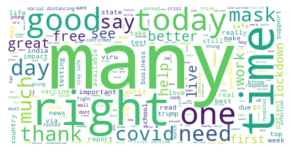

In [ ]:
pos_wc = "".join(pos_df['text'].values)
plt.figure(figsize=(5,5))
create_word_cloud(pos_wc)

In [ ]:
topics = display_topics(model, tf_feature_names, no_top_words)

In [ ]:
dfd = pd.DataFrame(topics)
#print(dfd['Topic 0 words'])
dfd['Topic 4 words']

0         confirmed
1            number
2              data
3              risk
4              high
           ...     
1865        approve
1866            mha
1867    yuvstrong12
1868       youwecan
1869         venrap
Name: Topic 4 words, Length: 1870, dtype: object

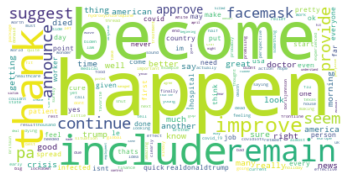

In [ ]:
#fields = ['Topic 3 words']
wordcloud2 = WordCloud( background_color="white").generate(' '.join(dfd['Topic 9 words']))
# Generate plot
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# LDA for negative sentiments

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(neg_df['text'].values)


from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
random_state=123, learning_method='batch')
X_topics = lda.fit_transform(X)


lda.components_.shape


n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print('Topic %d:' % (topic_idx + 1))
  print("".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))



from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term = count_vect.fit_transform(neg_df['text'].values.astype('U'))



from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term)


import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])





first_topic = LDA.components_[0]
first_topic



top_topic_words = first_topic.argsort()[-10:]
top_topic_words




for i in top_topic_words:
    print(count_vect.get_feature_names()[i])




for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')




topic_values = LDA.transform(doc_term)
topic_values.shape






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1:
trumprealdonaldtrumpamericausafailure
Topic 2:
testnegativehomevaccinetested
Topic 3:
averagebusinessfamilyhitrate
Topic 4:
spreadhelpriskslowdaily
Topic 5:
pastmonthdatalifemillion
Topic 6:
gamelongdeathclosedseason
Topic 7:
activeindiadaytotalsingle
Topic 8:
sickmakesadbadvirus
Topic 9:
schoolchildforcedstudentyear
Topic 10:
maskdeadamericanlikedont


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


tldr
certainty
alive
bbclaurak
promotion
vancouver
leap
nipost
5x
rbi
care
number
update
today
total
test
closed
american
active
dead
Top 10 words for topic #0:
['care', 'number', 'update', 'today', 'total', 'test', 'closed', 'american', 'active', 'dead']


Top 10 words for topic #1:
['selfreporting', 'sooner', 'identify', 'active', 'symptom', 'slow', 'risk', 'daily', 'help', 'spread']


Top 10 words for topic #2:
['single', 'world', 'death', '24', 'india', 'hour', 'worst', 'past', 'day', 'mask']


Top 10 words for topic #3:
['tested', 'realdonaldtrump', 'sick', 'game', 'mean', 'need', 'dont', 'trump', 'negative', 'test']


Top 10 words for topic #4:
['work', 'family', 'student', 'long', 'vulnerable', 'child', 'crisis', 'mental', 'hard', 'time']




(16014, 5)

In [ ]:

neg_df['Topic'] = topic_values.argmax(axis=1)
neg_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Subjectivity,Polarity,Analysis,Topic
5,continue rise almost bad ever politician busin...,0.666667,-0.70000,Negative,2
32,update total recovery reported country africa ...,0.833333,-0.20000,Negative,0
36,nicolekowalski5 chrisdameanor19 im feeling lit...,0.750000,-0.21875,Negative,3
57,crazy world come american fight get,0.450000,-0.30000,Negative,3
64,due aka ill sending first 500 like retweet 300...,0.569444,-0.12500,Negative,2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(neg_df['text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()





from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)




model.fit(tf)








def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)





no_top_words = 3000
display_topics(model, tf_feature_names, no_top_words)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,game,217.8,long,148.9,active,783.1,test,357.3,average,231.1,due,601.3,even,661.1,realdonaldtrump,350.0,time,415.1,due,296.7
1,sick,167.6,common,143.1,india,592.1,country,238.7,job,168.4,school,307.1,spread,633.1,trump,301.9,mean,339.7,mask,249.5
2,killed,164.4,life,139.7,day,480.2,state,222.6,worst,148.7,closed,212.2,help,620.1,dead,248.9,year,279.6,least,219.3
3,care,151.4,situation,129.2,total,426.1,world,212.4,daily,142.0,behind,176.1,risk,549.1,american,226.5,get,253.6,died,204.2
4,patient,140.5,due,128.7,past,325.1,negative,207.8,global,134.0,vaccine,174.5,slow,542.1,poor,178.6,long,203.7,ill,202.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,passenger,0.1,temporarily,0.1,retweet,0.1,tip,0.1,odisha,0.1,regional,0.1,lakh,0.1,announces,0.1,cureddischarged,0.1,covid19sa,0.1
1026,recorded,0.1,shah,0.1,sending,0.1,retweet,0.1,mp,0.1,52,0.1,cureddischarged,0.1,station,0.1,52,0.1,bjp,0.1
1027,tally,0.1,cureddischarged,0.1,smartphones,0.1,smartphones,0.1,cureddischarged,0.1,vijayawada,0.1,amit,0.1,temporarily,0.1,vijayawada,0.1,smartphones,0.1
1028,cureddischarged,0.1,amit,0.1,temporarily,0.1,cureddischarged,0.1,sooner,0.1,7day,0.1,52,0.1,shah,0.1,sooner,0.1,cureddischarged,0.1


In [ ]:
dfn=display_topics(model, tf_feature_names, no_top_words)

from google.colab import files
dfn.to_csv('lda_neg.csv') 
files.download('lda_neg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
topics = display_topics(model, tf_feature_names, no_top_words)





dfd = pd.DataFrame(topics)
#print(dfd['Topic 0 words'])
dfd['Topic 4 words']




0               average
1                   job
2                 worst
3                 daily
4                global
             ...       
1025             odisha
1026                 mp
1027    cureddischarged
1028             sooner
1029      selfreporting
Name: Topic 4 words, Length: 1030, dtype: object

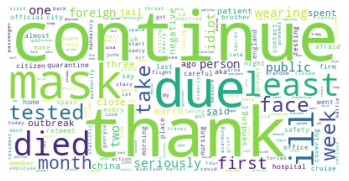

In [ ]:
#fields = ['Topic 3 words']
wordcloud2 = WordCloud( background_color="white").generate(' '.join(dfd['Topic 9 words']))
# Generate plot
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

# LDA for neutral sentiments

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english', max_df=.1, max_features=5000)
X = count.fit_transform(neu_df['text'].values)


from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,
random_state=123, learning_method='batch')
X_topics = lda.fit_transform(X)


lda.components_.shape


n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print('Topic %d:' % (topic_idx + 1))
  print("".join([feature_names[i]
  for i in topic.argsort()
    [:-n_top_words - 1:-1]]))



from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term = count_vect.fit_transform(neu_df['text'].values.astype('U'))



from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term)


import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])





first_topic = LDA.components_[0]
first_topic



top_topic_words = first_topic.argsort()[-10:]
top_topic_words




for i in top_topic_words:
    print(count_vect.get_feature_names()[i])




for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')




topic_values = LDA.transform(doc_term)
topic_values.shape




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1:
testingeconomystatewayvirus
Topic 2:
globalnewsbusinessimpactcrisis
Topic 3:
likerealdonaldtrumptrumpsaythink
Topic 4:
updateday2020augusttoday
Topic 5:
maskdonthomefacewear
Topic 6:
indiatotal24reportedhour
Topic 7:
covidtodaycitymedicallocal
Topic 8:
vaccineschoolstudenttrialchild
Topic 9:
needpatienthospitaltestedblood
Topic 10:
testministertrumptestedlife


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


empoweringsa
delivered
seco
vascular
nigeriainfoph
loop
fetus
pathway
advantage
17063
trump
business
response
travel
community
government
stop
july
spread
help
Top 10 words for topic #0:
['trump', 'business', 'response', 'travel', 'community', 'government', 'stop', 'july', 'spread', 'help']


Top 10 words for topic #1:
['uk', 'updated', 'like', 'coronainfoch', 'video', 'let', 'lockdown', 'august', '2020', 'corona']


Top 10 words for topic #2:
['tested', 'say', 'school', 'dont', 'trump', 'realdonaldtrump', 'vaccine', 'day', 'test', 'mask']


Top 10 words for topic #3:
['tally', 'death', 'report', 'today', 'hour', 'number', '24', 'reported', 'india', 'total']


Top 10 words for topic #4:
['today', 'vaccine', 'testing', 'type', 'patient', 'plasma', 'update', 'hospital', 'blood', 'need']




(52070, 5)

In [ ]:
neu_df['Topic'] = topic_values.argmax(axis=1)
neu_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Subjectivity,Polarity,Analysis,Topic
2,diane3443 wdunlap realdonaldtrump trump never ...,0.000000,0.0,Neutral,0
3,brookbanktv one gift give appreciation simple ...,0.357143,0.0,Neutral,1
4,25 july medium bulletin novel coronavirusupdat...,0.000000,0.0,Neutral,1
9,pope god prophet sadhu sundar selvaraj watch h...,0.000000,0.0,Neutral,0
11,order httpstco4nurgx6ema logo graphicdesigner ...,0.000000,0.0,Neutral,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(neu_df['text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()





from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)




model.fit(tf)








def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)





no_top_words = 3000
display_topics(model, tf_feature_names, no_top_words)











/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,mask,1664.9,take,630.0,need,1814.6,vaccine,1196.1,american,743.1,india,1988.6,news,737.2,today,1527.1,get,1104.1,school,877.1
1,spread,527.8,patient,537.4,blood,726.1,day,1035.4,corona,692.7,last,1392.9,global,648.1,tested,1167.8,realdonaldtrump,797.9,rate,646.1
2,face,501.3,look,372.6,help,546.0,year,384.2,via,674.0,24,1231.1,covid,522.4,update,1124.0,dont,756.0,child,509.0
3,wear,481.9,like,325.7,hospital,536.1,china,364.8,died,655.3,hour,1077.1,alert,327.1,test,1065.2,know,632.2,world,486.1
4,wearing,280.1,care,285.7,plasma,527.1,month,349.1,watch,530.1,total,809.1,travel,312.4,total,1043.1,trump,620.9,one,471.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,secunderabad,0.1,yashoda,0.1,49931,0.1,secunderabad,0.1,64553,0.1,opositive,0.1,secunderabad,0.1,secunderabad,0.1,49931,0.1,secunderabad,0.1
2621,yashoda,0.1,57982,0.1,57982,0.1,yashoda,0.1,opositive,0.1,secunderabad,0.1,yashoda,0.1,yashoda,0.1,63489,0.1,yashoda,0.1
2622,57982,0.1,78761,0.1,78761,0.1,57982,0.1,secunderabad,0.1,yashoda,0.1,57982,0.1,78761,0.1,secunderabad,0.1,57982,0.1
2623,moneyforthepeople,0.1,moneyforthepeople,0.1,moneyforthepeople,0.1,moneyforthepeople,0.1,yashoda,0.1,moneyforthepeople,0.1,moneyforthepeople,0.1,moneyforthepeople,0.1,yashoda,0.1,moneyforthepeople,0.1


In [ ]:
dfnu=display_topics(model, tf_feature_names, no_top_words)

from google.colab import files
dfnu.to_csv('lda_nu.csv') 
files.download('lda_nu.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
topics = display_topics(model, tf_feature_names, no_top_words)

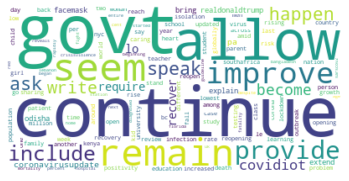

In [ ]:
dfd = pd.DataFrame(topics)
#print(dfd['Topic 0 words'])
dfd['Topic 4 words']





#fields = ['Topic 3 words']
wordcloud2 = WordCloud( background_color="white").generate(' '.join(dfd['Topic 9 words']))
# Generate plot
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()